In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch
from tqdm import tqdm
import os
import random
from data_augmentation import build_balanced_augmented_tensor_dataset  # calcoliamo l'exlained variance sui dati augmentati

In [24]:
# CONFIGURAZIONE
base_dir = os.getcwd()
dataset_path = os.path.join(base_dir, 'data_images', 'train')  # analisi su training set
batch_size = 32
image_size = 224

In [25]:
# riproducibilità
random.seed(42)
torch.manual_seed(42)

In [26]:
# carica dati bilanciati e augmentati
imgs, labels, classes = build_balanced_augmented_tensor_dataset(
    image_folder_path=dataset_path,
    image_size=image_size,
    grayscale=False,
    normalize_mode="minmax"  # fondamentale per PCA
)

In [27]:
# flatten delle immagini [N, C, H, W] → [N, C*H*W]
data = imgs.view(imgs.size(0), -1).numpy()

In [28]:
# PCA
pca = PCA()
pca.fit(data)

PCA()

In [29]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

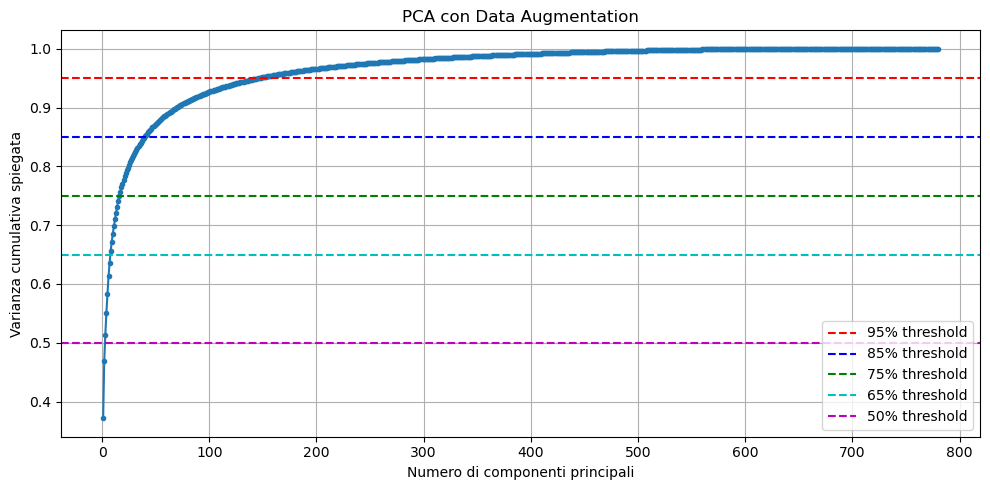

In [30]:
# grafico
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='.')
for y, c in zip([0.95, 0.85, 0.75, 0.65, 0.50], ['r', 'b', 'g', 'c', 'm']):
    plt.axhline(y=y, color=c, linestyle='--', label=f'{int(y*100)}% threshold')
plt.xlabel('Numero di componenti principali')
plt.ylabel('Varianza cumulativa spiegata')
plt.title('PCA con Data Augmentation')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [31]:
# stampa soglie
soglie = [0.95, 0.85, 0.75, 0.65, 0.50]
for soglia in soglie:
    num_components = np.argmax(cumulative_variance >= soglia) + 1
    print(f"Componenti che spiegano almeno il {int(soglia*100)}% della varianza: {num_components}")

Componenti che spiegano almeno il 95% della varianza: 146
Componenti che spiegano almeno il 85% della varianza: 40
Componenti che spiegano almeno il 75% della varianza: 17
Componenti che spiegano almeno il 65% della varianza: 8
Componenti che spiegano almeno il 50% della varianza: 3


In [ ]:
print(f"Numero immagini (n_samples): {data.shape[0]}")
print(f"Numero feature per immagine (n_features): {data.shape[1]}")
